dict_keys(['__header__', '__version__', '__globals__', 'X097_DE_time', 'X097_FE_time', 'X097RPM'])


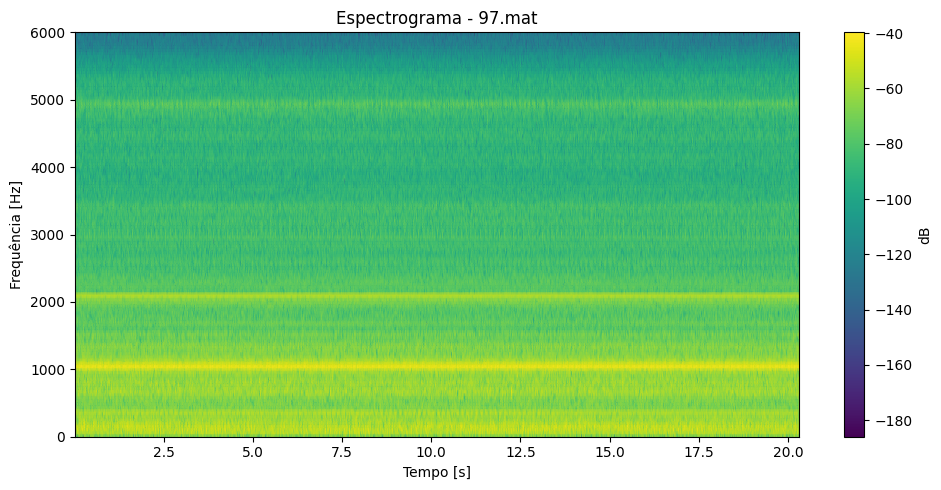

In [3]:
# 1. Importar bibliotecas
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import os

# 2. Carregar o arquivo .mat
mat_path = "../data/raw_cwru/97.mat"
data = scipy.io.loadmat(mat_path)

# O nome da variável depende do sensor:
# Geralmente 'DE_time' (Drive End), 'FE_time' (Fan End), ou 'BA_time'
print(data.keys())

# Pegamos o canal principal (ex: DE_time)
key = next(k for k in data.keys() if "_DE_time" in k)
signal = data[key].squeeze()

# 3. Pré-processar o sinal
signal = signal - np.mean(signal)  # Remover offset DC

# 4. Gerar espectrograma
fs = 12000  # frequência de amostragem (verificar no site da CWRU)
f, t, Sxx = spectrogram(signal, fs=fs, nperseg=256, noverlap=128)

# 5. Plotar espectrograma
plt.figure(figsize=(10, 5))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title('Espectrograma - 97.mat')
plt.colorbar(label='dB')
plt.tight_layout()

# 6. Salvar imagem
os.makedirs("../plots", exist_ok=True)
plt.savefig("../plots/spectrogram_97.png")
plt.show()


dict_keys(['__header__', '__version__', '__globals__', 'data', 'fs', 'ru_raw'])


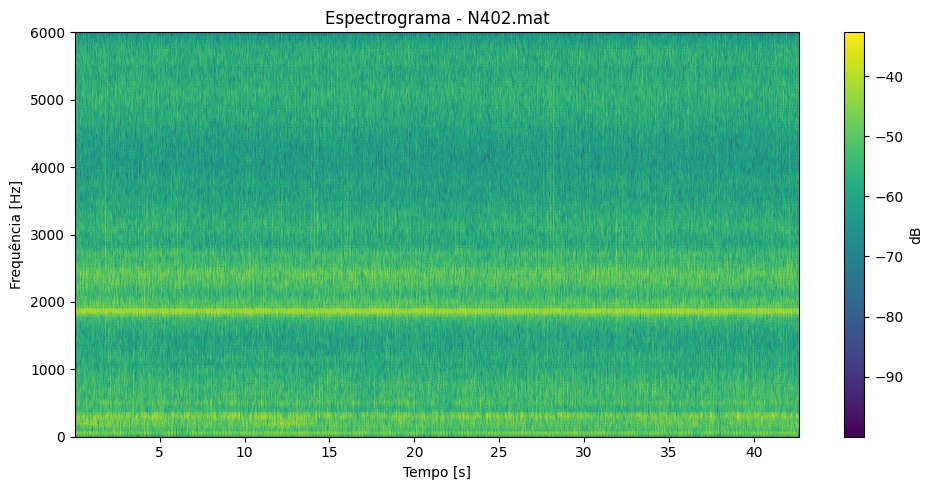

In [6]:
# Caminho do arquivo HUST
mat_path = "../data/raw_hust/N402.mat"
data = scipy.io.loadmat(mat_path)

# Tenta encontrar automaticamente a chave do sinal
key = next((k for k in data.keys() if not k.startswith("__") and isinstance(data[k], np.ndarray)), None)
print(data.keys())

# Extrai o sinal
signal = data[key].squeeze()
signal = signal - np.mean(signal)  # Remove offset DC

# Gera o espectrograma
fs = 12000  # frequência de amostragem (ajustar se diferente no HUST)
f, t, Sxx = spectrogram(signal, fs=fs, nperseg=256, noverlap=128)

# Plot
plt.figure(figsize=(10, 5))
plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap='viridis')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title(f'Espectrograma - {os.path.basename(mat_path)}')
plt.colorbar(label='dB')
plt.tight_layout()

# Salvar
plt.savefig(f"../plots/spectrogram_{os.path.splitext(os.path.basename(mat_path))[0]}.png")
plt.show()
